# Session 5 Hands on Lab

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Change into grayscale

In [4]:
img = cv2.imread('./Session_5/Session_5/chessboard.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


## Harris 


In [14]:
# harris
harris = cv2.cornerHarris(gray, 2, 5, 0.04)

harris_result = img.copy()
harris_result[harris > 0.01 * harris.max()] = [0, 0, 255]

harris_result = cv2.cvtColor(harris_result, cv2.COLOR_BGR2RGB)


## Subpix

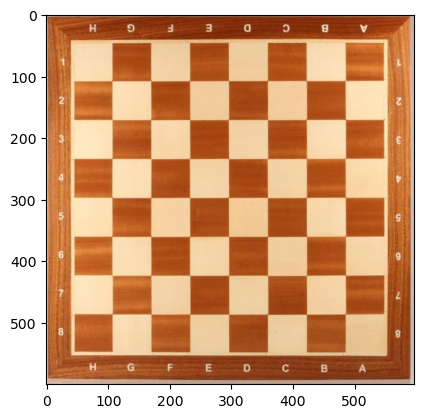

In [15]:
#subpix
_, thresh = cv2.threshold(harris, 0.01 * harris.max(), 255, cv2.THRESH_BINARY)

#butuh uint8 karena nanti akan memerlukan sebuah tipe data seperti itu 
thresh = np.uint8(thresh)
# connectedComponents WithStat itu menyesuaikan 4 hal yang ada centroidnya itu
_, _, _, centroid =  cv2.connectedComponentsWithStats(thresh)
# 0.001 itu batas error
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
# memberikan sebuah tanda merah pada sebuah korner 
corners = cv2.cornerSubPix(gray, np.float32(centroid), (5,5), (-1, -1), criteria)

corners = np.uint16(corners)
subpix_result = img.copy()

for corner in corners:
    corner_x = corner[0]
    corner_y = corner[1]
    subpix_result[corner_y, corner_x] = [0, 0, 255]

subpix_result = cv2.cvtColor(subpix_result, cv2.COLOR_BGR2RGB)

plt.imshow(subpix_result)
plt.show()

## FAST

In [ ]:
fast = cv2.FastFeatureDetector_create()
keypoints_fast = fast.detect(img)
fast_result = img.copy()
fast_result = cv2.drawKeypoints(img, keypoints_fast, fast_result, (255,0,0))
fast_result = cv2.cvtColor(fast_result, cv2.COLOR_BGR2RGB)

# fast itu menggunakan komputasi cepat 

## ORB


In [34]:
orb = cv2.ORB_create()
keypoints_orb = orb.detect(img)
orb_result = img.copy()
orb_result = cv2.drawKeypoints(img, keypoints_orb, orb_result, (255, 0, 0))
orb_result = cv2.cvtColor(orb_result, cv2.COLOR_BGR2RGB)

# orb itu jauh lebih teliti 

## FAST & ORB COMPARISON RESULT

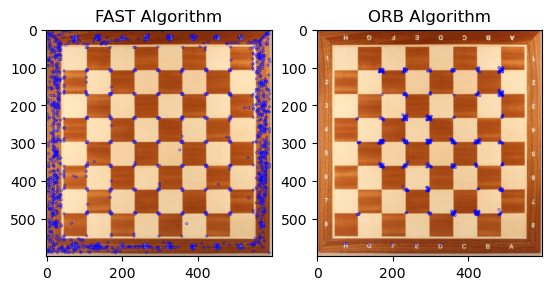

In [33]:
plt.subplot(1, 2, 1)
plt.imshow(fast_result)
plt.title("FAST Algorithm")

plt.subplot(1, 2, 2)
plt.imshow(orb_result)
plt.title("ORB Algorithm")

plt.show()